# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [1]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh Aragorn 240419

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/9. Reward_Airpuff_Generalization
Target path is:
  data_Probabilistic_Reward_Airpuff_Generalization
Searching for Aragorn for 240419
  Copying : 240419_Aragorn_generalization.h5
  Copied  : 240419_Aragorn_generalization.h5
  Total number of files moved: 1
Fractal folder is: 20240419
  Copied fractal folder to all fractals folder
Done.


In [16]:
%load_ext autoreload
%autoreload 2
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
# TASK = Probabilistic_Reward_Airpuff_5x2
# TASK = 'Probabilistic_Reward_Airpuff_Choice'
TASK = 'Probabilistic_Reward_Airpuff_Generalization' 

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Generalization
  Number of Total Files  : 22
  Monkey: Bear
    Number of Bear Files : 4
    Earliest Date    : 240207
    Most Recent Date : 240402
  Monkey: Aragorn
    Number of Aragorn Files : 16
    Earliest Date    : 240110
    Most Recent Date : 240419
No video folder found for task: Probabilistic_Reward_Airpuff_Generalization
Pulling '.h5' files...
  Complete: 20 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [19]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2024-04-19' #@param {type:"date"}
end_date = '2024-04-19' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  240419_Aragorn_generalization.h5 - Completed
Converting .h5 to python:
  <HDF5 file "240419_Aragorn_generalization.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 342
  Choice task detected.
Parsing session data...


  0%|          | 0/342 [00:00<?, ?it/s]

  Complete.
    Correct trials: 300
    Errored trials: 41
    Session Length:  00:38:30
Parsing camera data...
  No camera data attached to ML file.
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-89.897,-56.189)
  Max Values (X,Y): (134.154,149.794)
  Reward Mag: 1.0
    Reward Drops: 10.0
    Reward Frequency: 1.0
    Reward Length: 220.0
  Reward Mag: 0.5
    Reward Drops: 5.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.25
    Reward Drops: 2.0
    Reward Frequency: 1.0
    Reward Length: 200.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...
  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/processed/processed_Probabilistic_Reward

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [18]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num  subject  trial_num  block  condition  correct  error  \
0  240419            0  aragorn          1      1          1        1      0   
1  240419            0  aragorn          2      1          1        1      0   
3  240419            0  aragorn          4      1          1        1      0   
4  240419            0  aragorn          5      1          1        1      0   
5  240419            0  aragorn          6      1          1        1      0   

   error_type                            behavioral_code_markers  \
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
4           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 11...   

                               behavioral_code_times stimuli_name_0 x_0_pos  \
0  [2.814899999066256, 2834.29829999659, 2910.066...           _fix   [0.0]   
1  [2310.2044999977807, 2401.315999999497, 2434.4...           _fix   [0.0]   
3  [1465.8487999986392, 1568.8007999997353, 1601....           _fix   [0.0]   
4  [2216.002799999842, 2331.511500000488, 2364.57...           _fix   [0.0]   
5  [1497.700399999303, 1588.6351999979524, 1622.6...           _fix   [0.0]   

  y_0_pos stimuli_name_1 x_1_pos y_1_pos stimuli_name_2 x_2_pos y_2_pos  \
0   [0.0]     _fractal_A   [0.0]   [0.0]     _fractal_A   [0.0]   [0.0]   
1   [0.0]     _fractal_B   [0.0]   [0.0]     _fractal_B   [0.0]   [0.0]   
3   [0.0]     _fractal_A  [-7.0]   [0.0]     _fractal_B   [7.0]   [0.0]   
4   [0.0]     _fractal_C   [0.0]   [0.0]     _fractal_C   [0.0]   [0.0]   
5   [0.0]     _fractal_D   [0.0]   [0.0]     _fractal_D   [0.0]   [0.0]   

   reward_1  reward_prob_1  reward_mag_1  reward_drops_1  reward_length_1  \
0         1            1.0          1.00            10.0            220.0   
1         1            1.0          0.50             5.0            200.0   
3         1            1.0          1.00            10.0            220.0   
4         1            1.0          0.25             2.0            200.0   
5         0            0.0          0.00             0.0              0.0   

   reward_2  reward_prob_2  reward_mag_2  airpuff_1  airpuff_prob_1  \
0         0            0.0           0.0          0             0.0   
1         0            0.0           0.0          0             0.0   
3         1            1.0           0.5          0             0.0   
4         0            0.0           0.0          0             0.0   
5         0            0.0           0.0          0             0.0   

   airpuff_mag_1  airpuff_2  airpuff_prob_2  airpuff_mag_2  \
0            0.0          0             0.0            0.0   
1            0.0          0             0.0            0.0   
3            0.0          0             0.0            0.0   
4            0.0          0             0.0            0.0   
5            0.0          0             0.0            0.0   

                                               eye_x  \
0  [-0.07655408694837529, -0.07644179173765406, -...   
1  [0.03842292336508252, 0.03842292336508252, 0.0...   
3  [-0.6969730704619828, -0.6969730704619828, -0....   
4  [134.1540782674271, 134.1540782674271, 134.154...   
5  [134.1540782674271, 134.1540782674271, 134.154...   

                                               eye_y  \
0  [10.398794853329393, 10.393994683250067, 10.39...   
1  [-3.488749948827725, -3.488749948827725, -3.48...   
3  [14.555164396997206, 14.555164396997206, 14.33...   
4  [149.79379578219678, 149.79379578219678, 149.7...   
5  [149.79379578219678, 149.79379578219678, 149.7...   

                                           eye_pupil  \
0  [6997.0, 6996.0, 6996.0, 6996.0, 6996.0, 7003....   
1  [7374.0, 7374.0, 7363.0, 7363.0, 7363.0, 7363....   
3  [6186.0, 6186.0, 6165.0, 6165.0, 6137.0, 6137....   
4  [0.0, 0.0, 0.0, 0.0, 0.0,

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

240419
  perf_by_fractal.png saved.


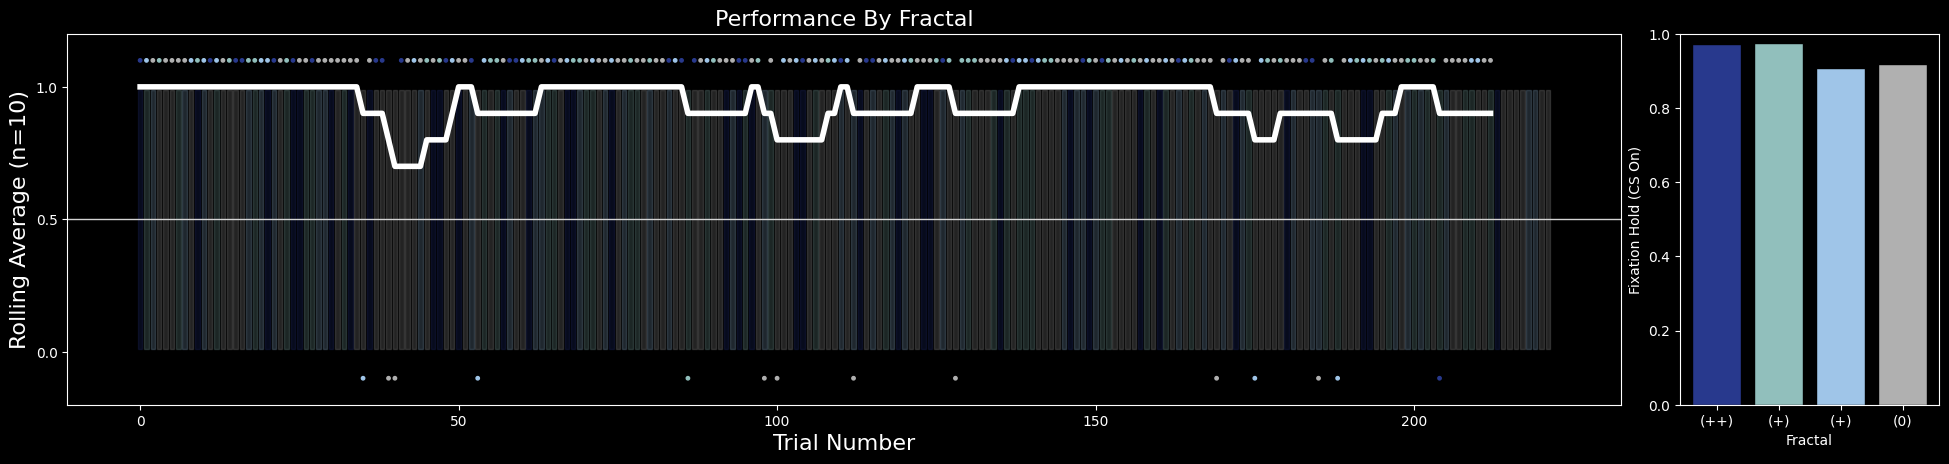

  session_latency.png saved.


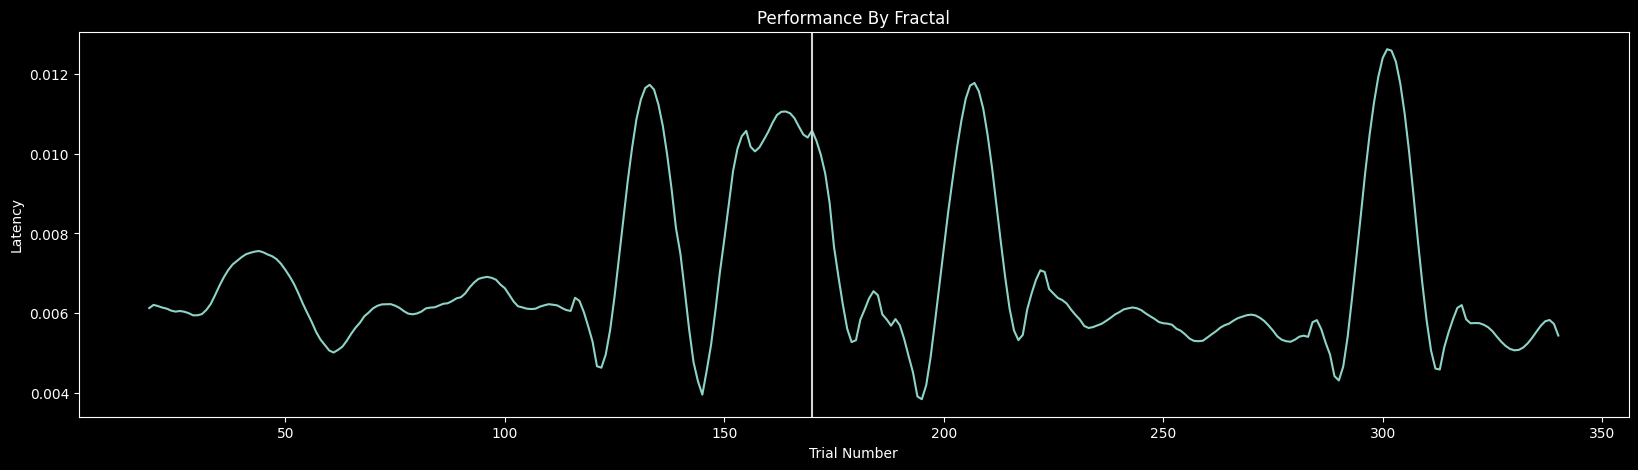

  epoch_hist.png saved.


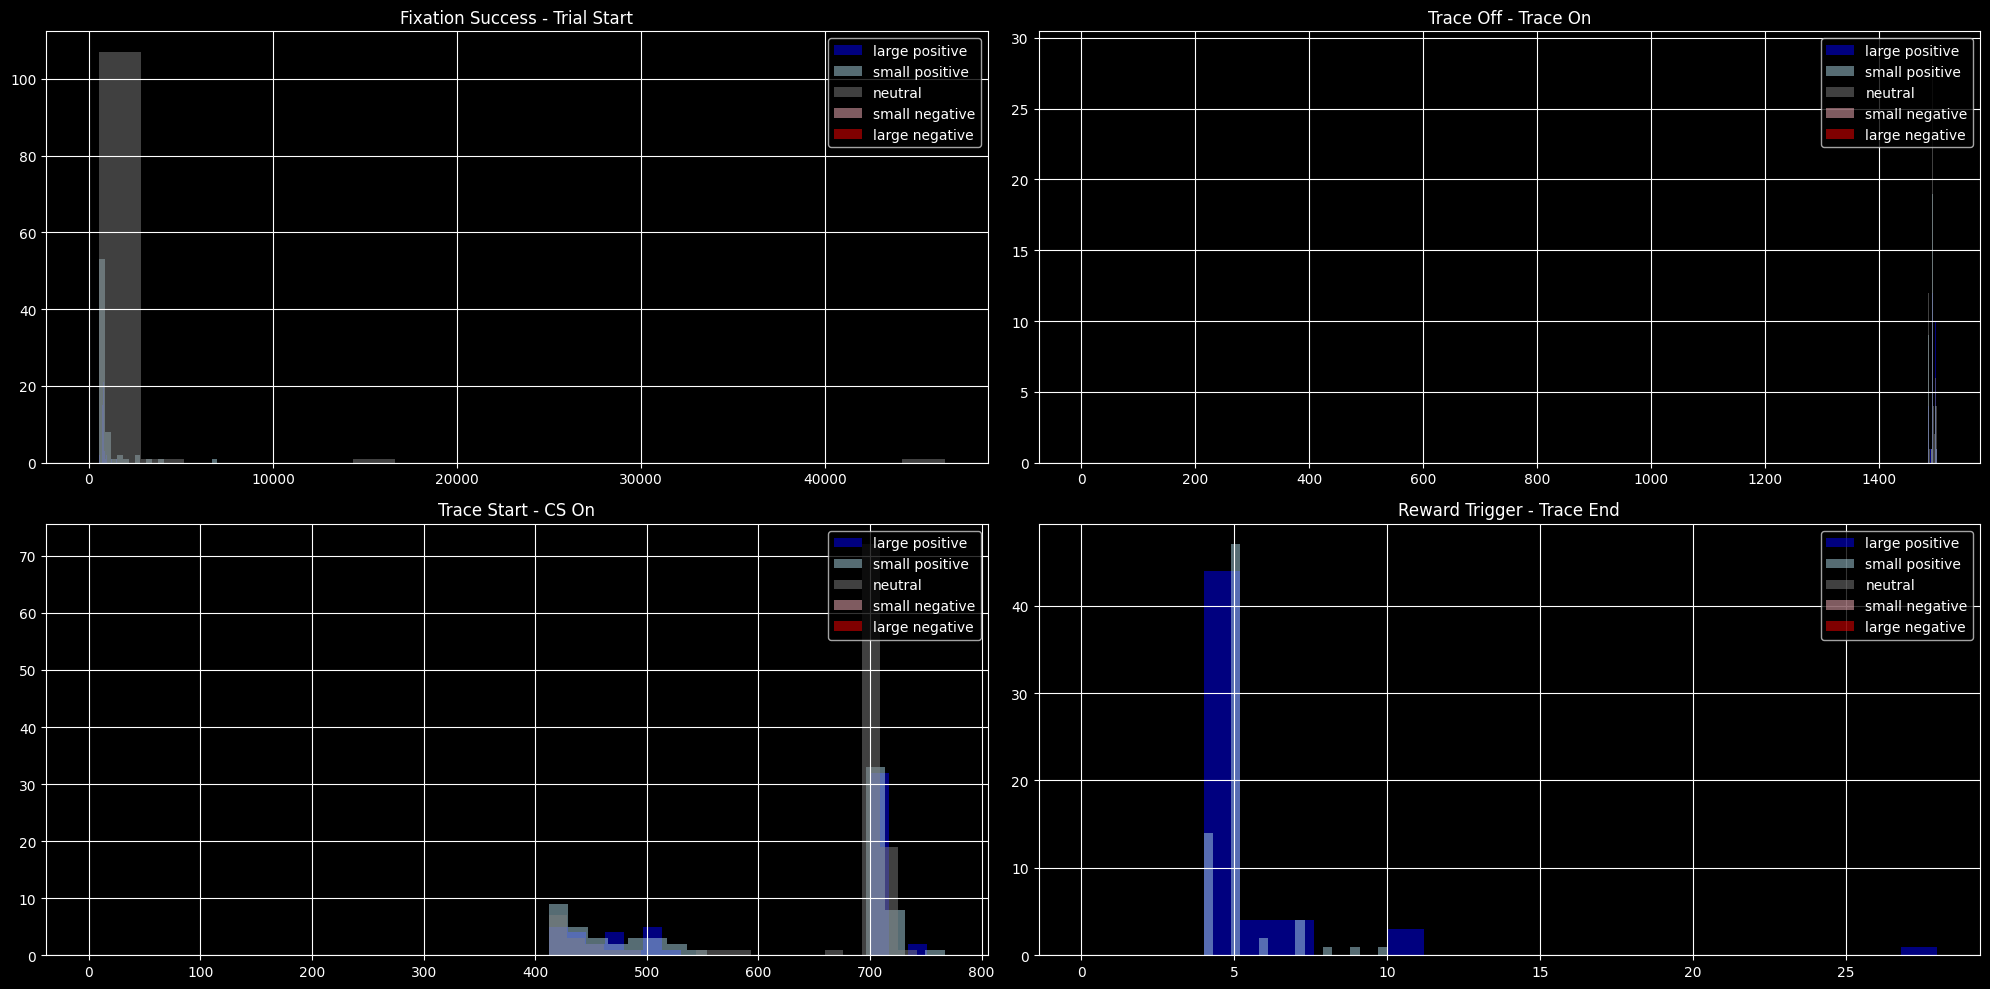

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: 0.054 | Blink Correlation: -0.057
  Valence 0.5: Lick Correlation: -0.235 | Blink Correlation: 0.245
  Valence 0.25: Lick Correlation: -0.41 | Blink Correlation: -0.166
  Valence 0.0: Lick Correlation: 0.032 | Blink Correlation: 0.099
Block: 2
  Valence 1.0: Lick Correlation: -1.0 | Blink Correlation: nan
  Valence 0.5: Lick Correlation: -0.128 | Blink Correlation: -0.134
  Valence 0.25: Lick Correlation: 0.163 | Blink Correlation: 0.723
  Valence 0.0: Lick Correlation: -0.404 | Blink Correlation: -0.158


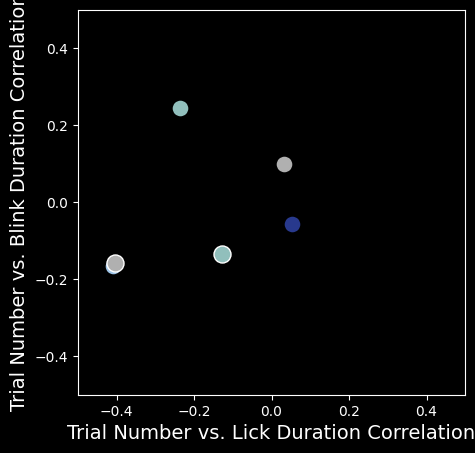

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


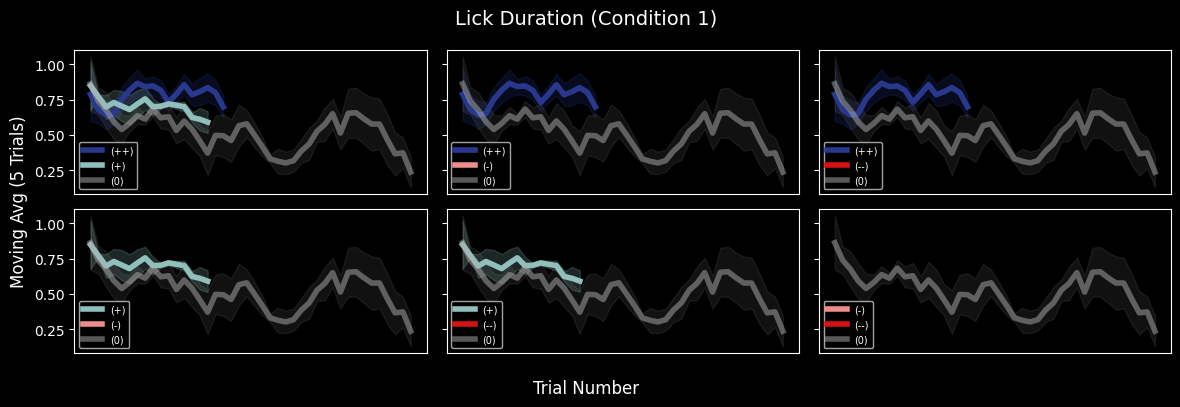

  t_test_DEM-duration_1.png saved.


  t_test_blink-duration_1.png saved.


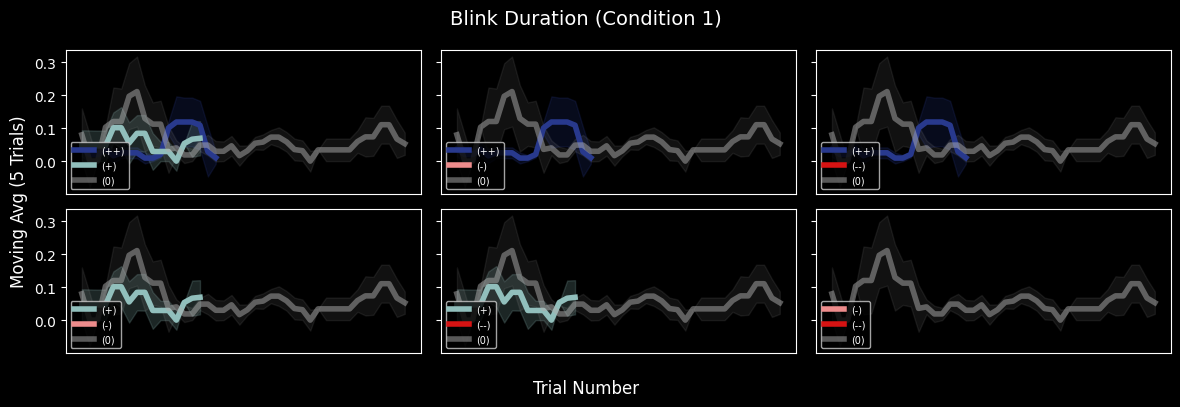

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


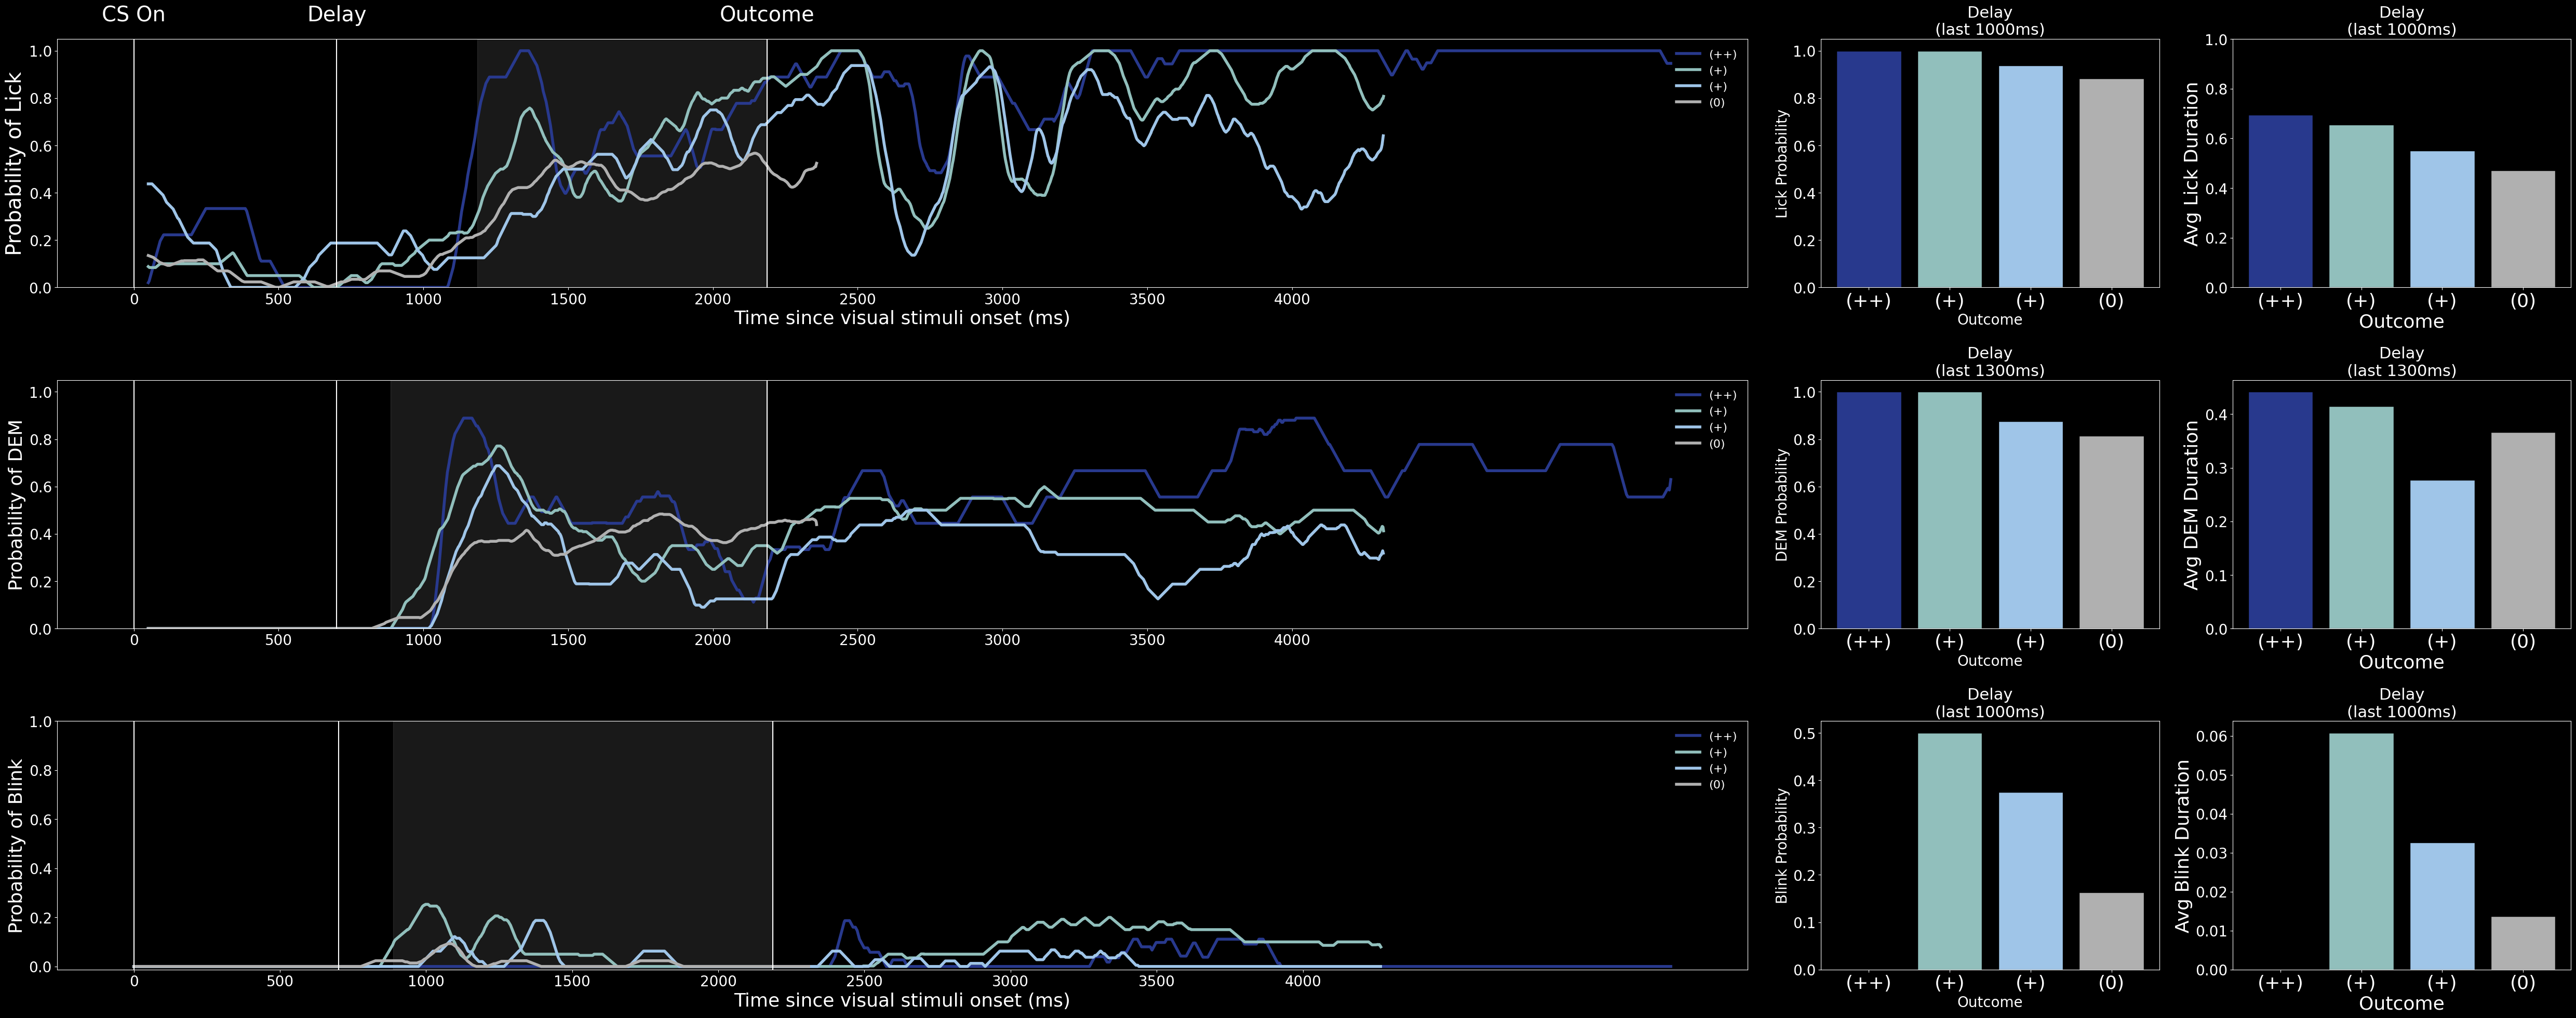

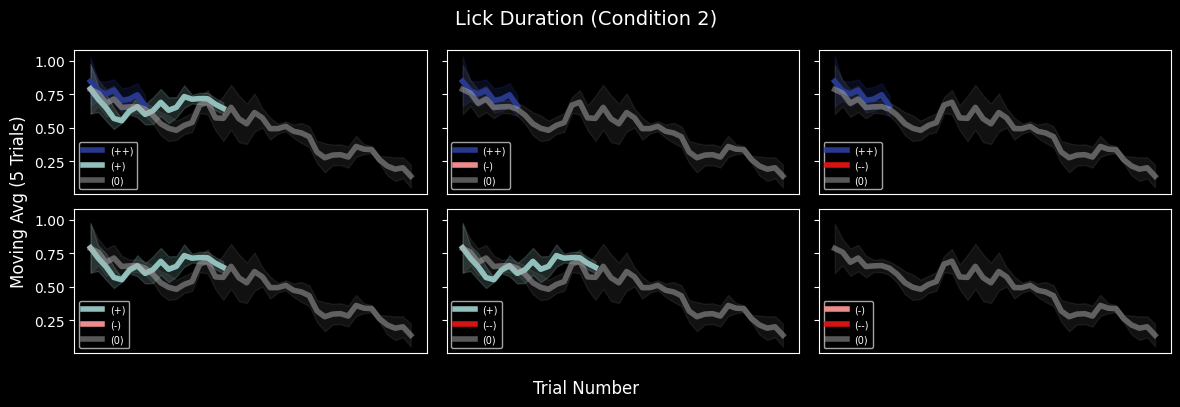

  t_test_DEM-duration_2.png saved.


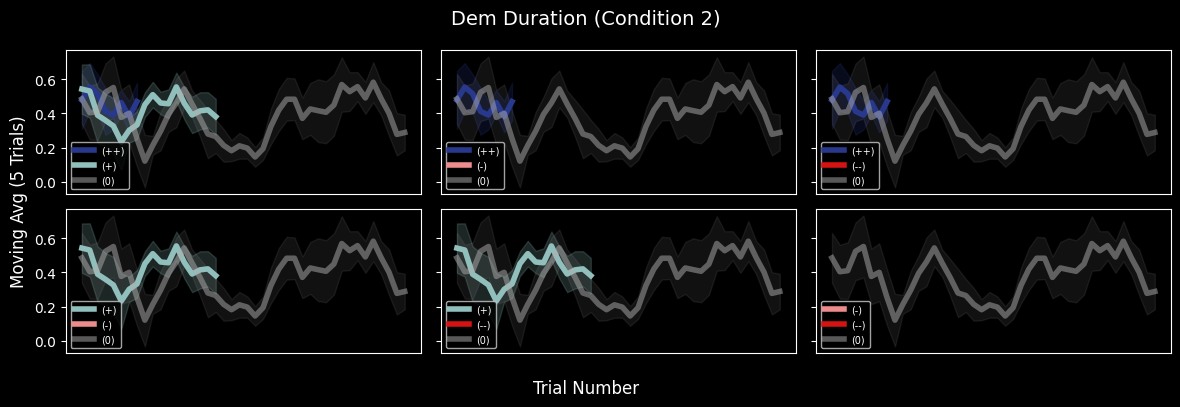

  t_test_blink-duration_2.png saved.


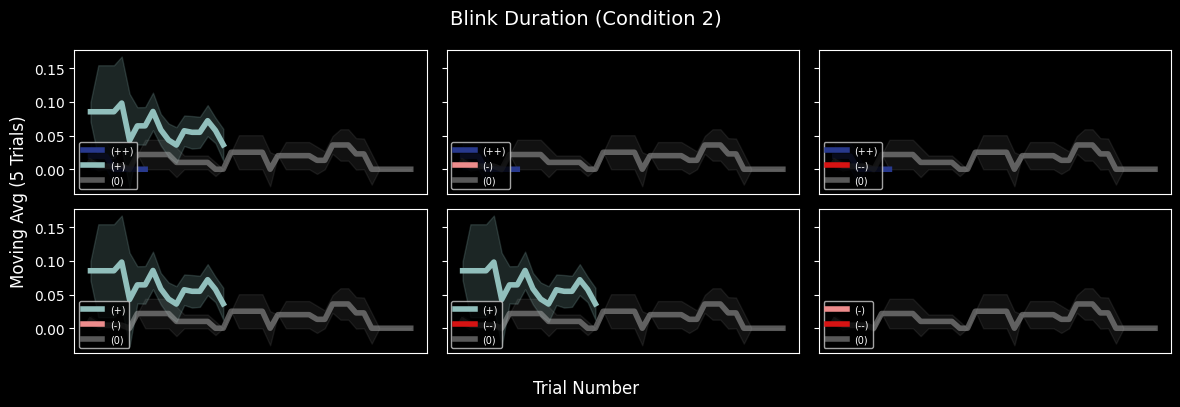

 [0.0, 0.25, 0.5, 1.0] ANOVA 15.125 | P-value: 2.89E-07
  (0, 1) T-value: -2.473 P-value: 1.88E-02 |  Z-value: -2.119 P-value: 3.41E-02
    0 Lick Mean: 0.359 Lick Std: 0.233 Trials: 23
    1 Lick Mean: 0.518 Lick Std: 0.136 Trials: 12
  (0, 2) T-value: -5.952 P-value: 1.57E-06 |  Z-value: -4.598 P-value: 4.26E-06
    0 Lick Mean: 0.359 Lick Std: 0.233 Trials: 23
    2 Lick Mean: 0.688 Lick Std: 0.079 Trials: 12
  (0, 3) T-value: -5.489 P-value: 1.01E-05 |  Z-value: -4.989 P-value: 6.06E-07
    0 Lick Mean: 0.359 Lick Std: 0.233 Trials: 23
    3 Lick Mean: 0.766 Lick Std: 0.174 Trials: 11
  (1, 2) T-value: -3.561 P-value: 2.28E-03 |  Z-value: -3.561 P-value: 3.70E-04
    1 Lick Mean: 0.518 Lick Std: 0.136 Trials: 12
    2 Lick Mean: 0.688 Lick Std: 0.079 Trials: 12
  (1, 3) T-value: -3.609 P-value: 1.88E-03 |  Z-value: -3.65 P-value: 2.63E-04
    1 Lick Mean: 0.518 Lick Std: 0.136 Trials: 12
    3 Lick Mean: 0.766 Lick Std: 0.174 Trials: 11
  (2, 3) T-value: -1.312 P-value: 2.11E-01 | 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (--) vs (-): ks_stat: 0.28, p_val: 1.47E-02
  (--) vs (0): ks_stat: 0.37, p_val: 3.62E-04
  (--) vs (+): ks_stat: 0.47, p_val: 7.46E-08
  (-) vs (0): ks_stat: 0.18, p_val: 1.78E-01
  (-) vs (+): ks_stat: 0.38, p_val: 6.35E-06
  (0) vs (+): ks_stat: 0.26, p_val: 7.98E-03
Blink
  (--) vs (-): ks_stat: 0.19, p_val: 1.75E-01
  (--) vs (0): ks_stat: 0.17, p_val: 3.46E-01
  (--) vs (+): ks_stat: 0.1, p_val: 8.03E-01
  (-) vs (0): ks_stat: 0.06, p_val: 9.99E-01
  (-) vs (+): ks_stat: 0.15, p_val: 2.66E-01
  (0) vs (+): ks_stat: 0.11, p_val: 6.18E-01
Total Eye Positions: 54000
Histogram Positions: 52931
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0109 0.0031 0.     0.     0.    ]
 [0.0001 0.0001 0.0002 0.0768 0.0884 0.099  0.0032 0.    ]
 [0.     0.0021 0.0299 0.2377 0.2439 

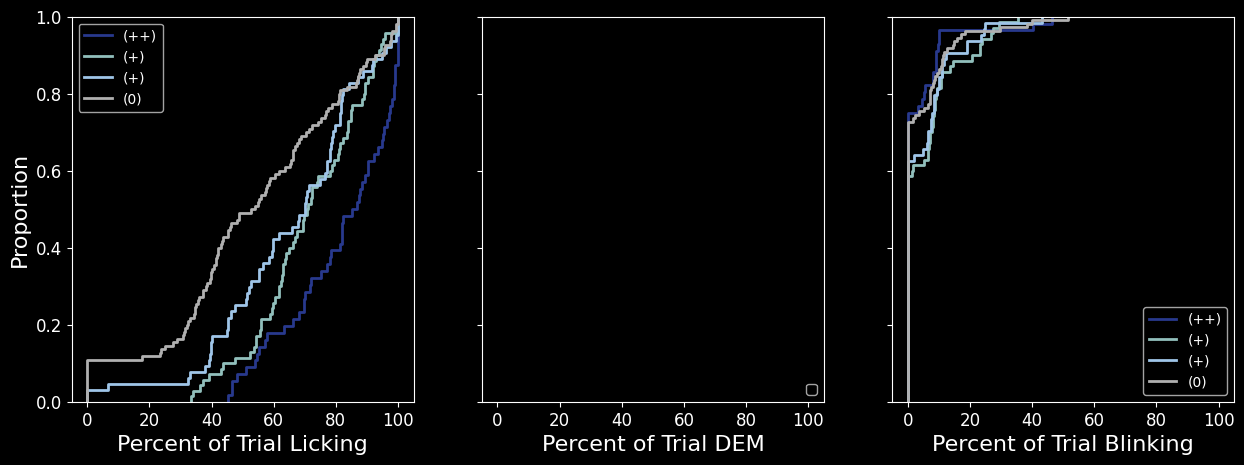

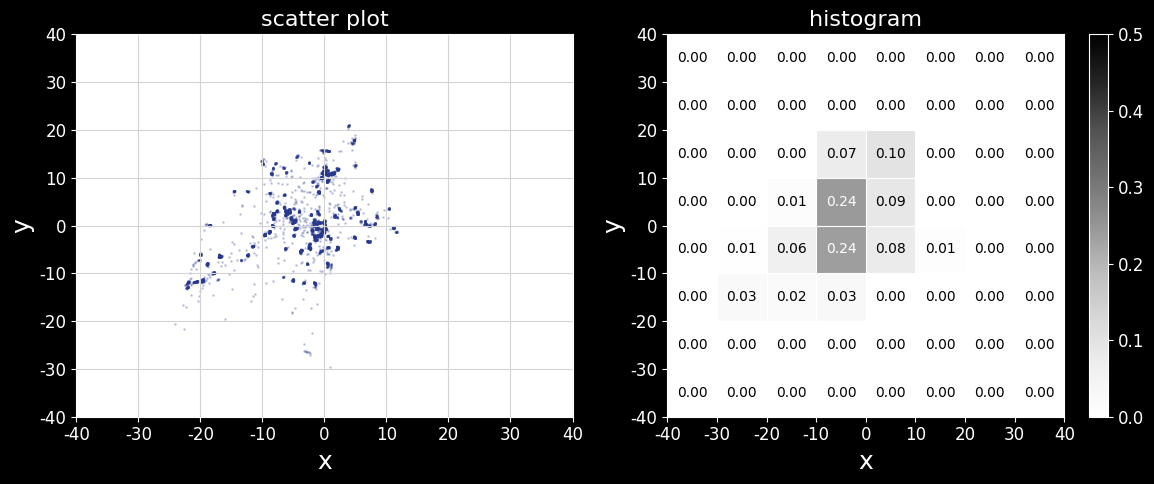

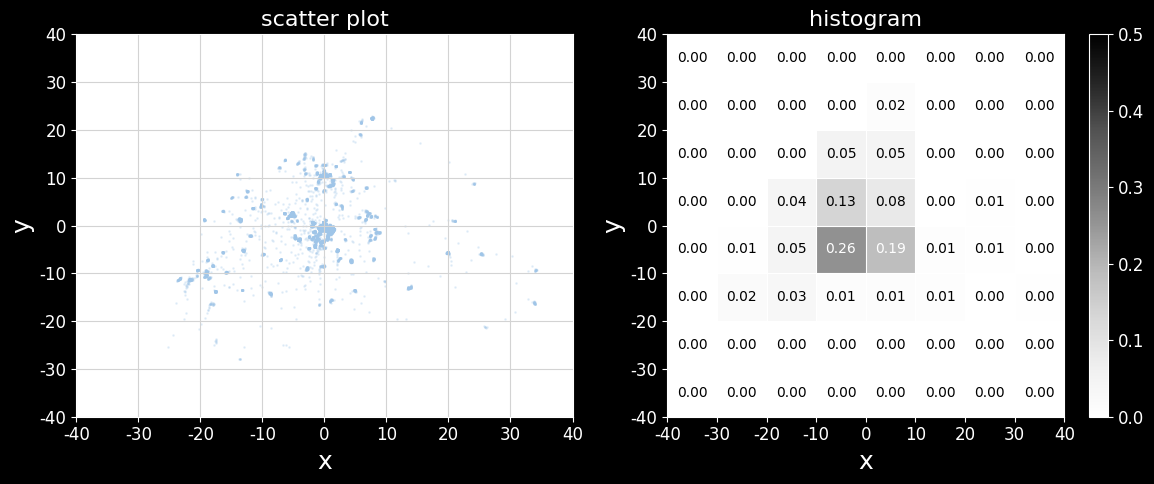

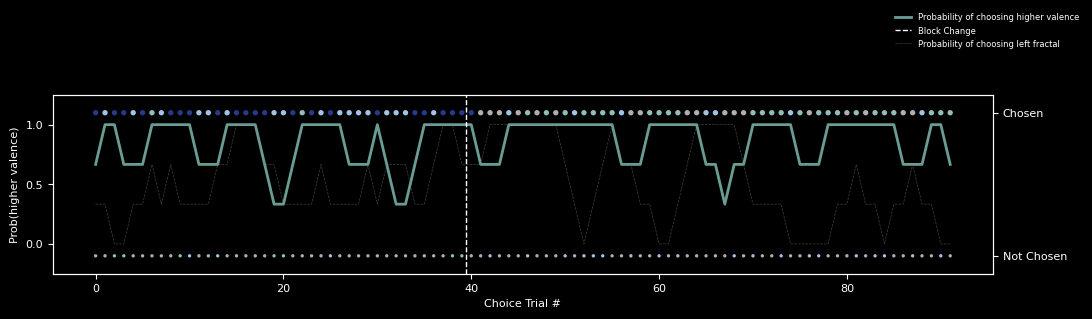

Reward vs. Airpuff Accuracy: 0.55 (+/- 0.26)
  lick_duration: 1.231
  blink_duration_offscreen: -0.361
  pupil_raster_window_avg: -0.005
  blink_duration_window: -0.112
  eye_distance: 0.025


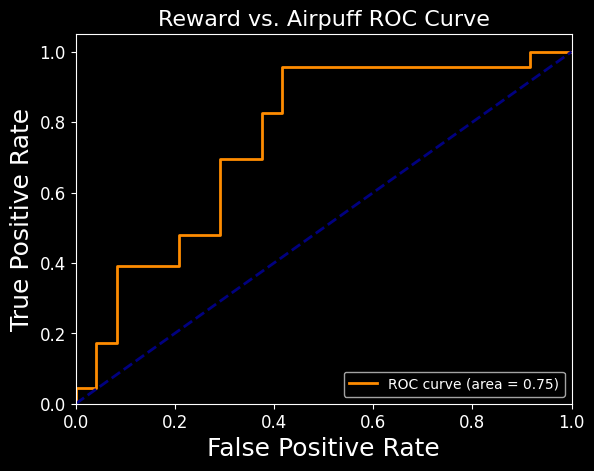

Large Reward vs. Small Reward Accuracy: 0.62 (+/- 0.20)
  lick_duration: 0.736
  blink_duration_offscreen: 0.458
  pupil_raster_window_avg: 0.071
  blink_duration_window: -0.013
  eye_distance: -0.007


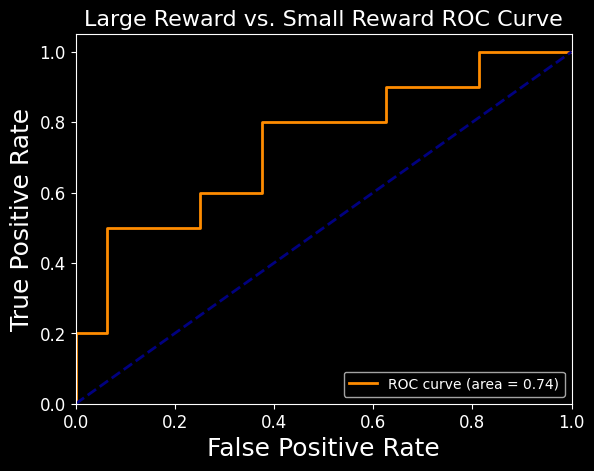


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20240419_aragorn.md
Writing to excel...
  Writing 240419 to Emotion_Tracker.xlsx


In [5]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	print(date)
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

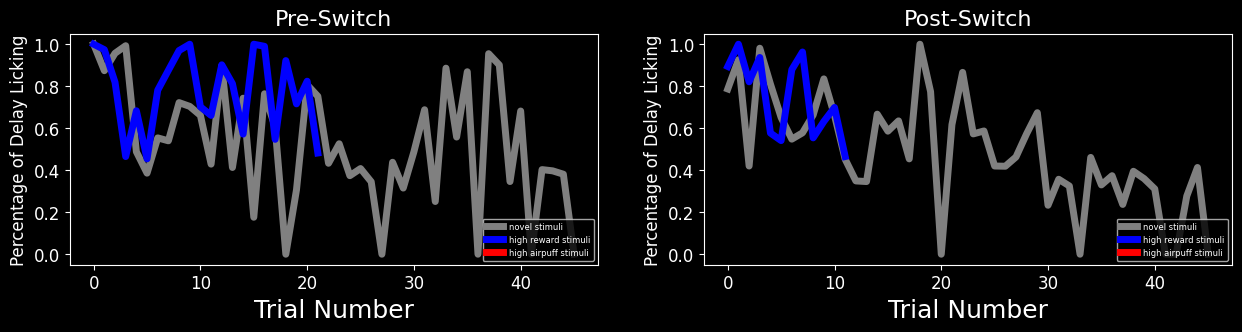

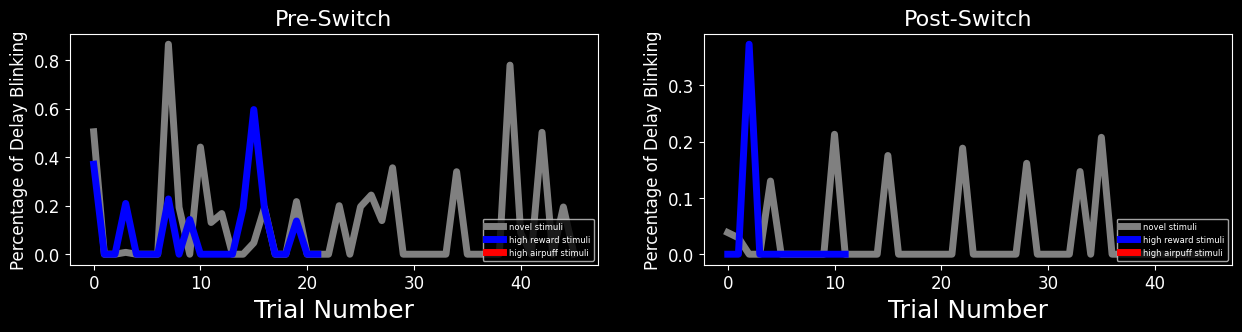

In [6]:
def novel_fractal_summary(session_df):
  session_df_correct = session_df[session_df['correct'] == 1]
  session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
  
  f, axarr = plt.subplots(1, 2, figsize=(15, 3))
  for i in [1,2]:
    session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
    session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
    session_novel = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) & (session_df_reinforcement['block'] == i)]
    session_novel_lick = session_novel['lick_duration']
    session_high_reward_lick = session_high_reward['lick_duration']
    session_high_airpuff_lick = session_high_airpuff['lick_duration']
    axarr[i-1].plot(range(len(session_novel_lick)), session_novel_lick, label='novel stimuli', color='grey', lw=5)
    axarr[i-1].plot(range(len(session_high_reward_lick)), session_high_reward_lick, label='high reward stimuli', color='blue', lw=5)
    axarr[i-1].plot(range(len(session_high_airpuff_lick)), session_high_airpuff_lick, label='high airpuff stimuli', color='red', lw=5)
    # # select row with index block_change
    axarr[i-1].set_xlabel('Trial Number')
    axarr[i-1].set_ylabel('Percentage of Delay Licking', fontsize=12)
    if i == 1:
      axarr[i-1].set_title('Pre-Switch')
    else:
      axarr[i-1].set_title('Post-Switch')
    axarr[i-1].legend(loc='lower right', fontsize=6)
  plt.show()

  f, axarr = plt.subplots(1, 2, figsize=(15, 3))
  for i in [1,2]:
    session_high_reward = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 1) & (session_df_reinforcement['block'] == i)]
    session_high_airpuff = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == -1) & (session_df_reinforcement['block'] == i)]
    session_novel = session_df_reinforcement.loc[(session_df_reinforcement['valence'] == 0) & (session_df_reinforcement['block'] == i)]
    session_novel_blink = session_novel['blink_duration_window']
    session_high_reward_blink = session_high_reward['blink_duration_window']
    session_high_airpuff_blink = session_high_airpuff['blink_duration_window']
    axarr[i-1].plot(range(len(session_novel_blink)), session_novel_blink, label='novel stimuli', color='grey', lw=5)
    axarr[i-1].plot(range(len(session_high_reward_blink)), session_high_reward_blink, label='high reward stimuli', color='blue', lw=5)
    axarr[i-1].plot(range(len(session_high_airpuff_blink)), session_high_airpuff_blink, label='high airpuff stimuli', color='red', lw=5)
    # # select row with index block_change
    axarr[i-1].set_xlabel('Trial Number')
    axarr[i-1].set_ylabel('Percentage of Delay Blinking', fontsize=12)
    axarr[i-1].legend(loc='lower right', fontsize=6)
    if i == 1:
      axarr[i-1].set_title('Pre-Switch')
    else:
      axarr[i-1].set_title('Post-Switch')
  plt.show()

novel_fractal_summary(session_df)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [7]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.937 (208/222)
   Valence 1.0: 0.971 (34/35)
   Valence 0.5: 0.977 (42/43)
   Valence 0.25: 0.909 (40/44)
   Valence 0.0: 0.92 (92/100)
 Percent successful choice trials: 0.885 (92/104)
   Valence Pair [0.25, 1.0]: 1.0 (3/3)
   Valence Pair [0.0, 0.5]: 0.933 (14/15)
   Valence Pair [0.25, 0.5]: 0.917 (22/24)
   Valence Pair [0.0, 0.25]: 0.913 (21/23)
   Valence Pair [0.0, 1.0]: 0.909 (10/11)
   Valence Pair [0.0, 0.0]: 0.812 (13/16)
   Valence Pair [0.5, 1.0]: 0.75 (9/12)
 Percent left choice trials: 0.511 (47/92)
 Percent higher valence choice trials: 0.859 (79/92)
   Valence Pair [0.5, 1.0]: 1.0 (9/9)
   Valence Pair [0.0, 1.0]: 1.0 (10/10)
   Valence Pair [0.0, 0.5]: 1.0 (14/14)
   Valence Pair [0.25, 1.0]: 1.0 (3/3)
   Valence Pair [0.0, 0.0]: 1.0 (13/13)
   Valence Pair [0.0, 0.25]: 0.762 (16/21)
   Valence Pair [0.25, 0.5]: 0.636 (14/22)


Reaction Time on Choice Trials
 Valence: 0.0
   Reaction Time: 138.667
   Valen

In [8]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg  \
valence                                                                     
0.00          0.508750                  0.398554                 0.039992   
0.25          0.632925                  0.339346                 0.051615   
0.50          0.694738                  0.439707                 0.058278   
1.00          0.768059                  0.464412                 0.030882   

         blink_duration_window  eye_distance  
valence                                       
0.00                  0.077124     70.341032  
0.25                  0.092058     72.247777  
0.50                  0.107473     89.937911  
1.00                  0.071652     83.580376

In [9]:
pd.set_option('display.max_rows', None)
session_df_choice = session_df_correct[session_df_correct['choice_trial'] == 1]
correct_choice_trials = [1 if session_df_choice['valence'].iloc[i] == np.max([session_df_choice['valence_1'].iloc[i], session_df_choice['valence_2'].iloc[i]], axis=0) else 0 for i in range(len(session_df_choice))]
session_df_choice['correct_choice'] = correct_choice_trials
session_df_choice[['block', 'valence_1', 'valence_2', 'valence', 'correct_choice']]

block  valence_1  valence_2  valence  correct_choice
3        1       1.00       0.50     1.00               1
8        1       0.00       0.25     0.25               1
12       1       0.50       1.00     1.00               1
19       1       0.50       1.00     1.00               1
24       1       0.50       0.25     0.25               0
25       1       1.00       0.00     1.00               1
29       1       0.00       0.50     0.50               1
35       1       0.25       0.00     0.25               1
38       1       0.50       1.00     1.00               1
41       1       1.00       0.50     1.00               1
46       1       0.25       1.00     1.00               1
48       1       0.00       0.25     0.25               1
52       1       0.25       0.50     0.25               0
65       1       0.25       1.00     1.00               1
70       1       0.25       0.00     0.25               1
75       1       1.00       0.50     1.00               1
78       1       1.00       0.00     1.00               1
89       1       1.00       0.00     1.00               1
99       1       1.00       0.00     1.00               1
105      1       0.50       0.25     0.25               0
110      1       0.25       0.50     0.25               0
111      1       0.00       1.00     1.00               1
114      1       0.00       0.50     0.50               1
120      1       1.00       0.50     1.00               1
122      1       0.00       0.25     0.25               1
123      1       1.00       0.25     1.00               1
133      1       0.00       0.25     0.25               1
135      1       0.00       0.25     0.25               1
136      1       0.25       0.50     0.25               0
139      1       0.00       0.25     0.25               1
142      1       1.00       0.00     1.00               1
144      1       0.00       0.25     0.25               1
145      1       0.25       0.50     0.25               0
148      1       0.25       0.50     0.25               0
149      1       0.00       1.00     1.00               1
155      1       0.00       1.00     1.00               1
158      1       0.25       0.00     0.25               1
159      1       1.00       0.00     1.00               1
160      1       1.00       0.50     1.00               1
168      1       1.00       0.50     1.00               1
169      1       0.00       1.00     1.00               1
170      2       0.00       0.00     0.00               1
182      2       0.00       0.25     0.00               0
185      2       0.00       0.00     0.00               1
187      2       0.25       0.00     0.25               1
193      2       0.00       0.00     0.00               1
195      2       0.50       0.25     0.50               1
199      2       0.00       0.00     0.00               1
205      2       0.50       0.00     0.50               1
207      2       0.00       0.00     0.00               1
209      2       0.50       0.25     0.50               1
210      2       0.00       0.25     0.25               1
212      2       0.25       0.50     0.50               1
221      2       0.25       0.50     0.50               1
227      2       0.50       0.25     0.50               1
228      2       0.50       0.00     0.50               1
230      2       0.25       0.00     0.25               1
231      2       0.25       0.00     0.00               0
232      2       0.00       0.00     0.00               1
244      2       0.00       0.50     0.50               1
246      2       0.25       0.50     0.50               1
247      2       0.00       0.50     0.50               1
250      2       0.25       0.50     0.50               1
251      2       0.00       0.00     0.00               1
252      2       0.00       0.00     0.00               1
254      2       0.25       0.00     0.25               1
255      2       0.25       0.50     0.25               0
256      2       0.00       0.00     0.00               1
257

In [10]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration  \
condition fractal_chosen                                                   
1         _fractal_A         1.00               21.045455       0.779636   
          _fractal_B         0.50               11.550000       0.709350   
          _fractal_C         0.25               17.476190       0.654000   
          _fractal_D         0.00               12.500000       0.429042   
          _fractal_E         0.00               11.500000       0.641773   
2         _fractal_A         0.00               12.700000       0.438800   
          _fractal_B         0.00               21.307692       0.523577   
          _fractal_C         0.25               13.526316       0.609632   
          _fractal_D         0.50               21.363636       0.681455   
          _fractal_E         1.00                6.500000       0.746833   

                          blink_duration_offscreen  pupil_raster_window_avg  \
condition fractal_chosen                                                      
1         _fractal_A                      0.471748                 0.043322   
          _fractal_B                      0.456654                 0.061654   
          _fractal_C                      0.378425                 0.064469   
          _fractal_D                      0.409295                 0.072147   
          _fractal_E                      0.433357                 0.060105   
2         _fractal_A                      0.384692                 0.015500   
          _fractal_B                      0.369852                 0.012130   
          _fractal_C                      0.296154                 0.037409   
          _fractal_D                      0.424301                 0.055210   
          _fractal_E                      0.450962                 0.008077   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.093776     95.036270  
          _fractal_B                   0.111962     99.607361  
          _fractal_C                   0.108535     73.245408  
          _fractal_D                   0.137083     86.348679  
          _fractal_E                   0.114301     78.927698  
2         _fractal_A                   0.033192     62.518954  
          _fractal_B                   0.024112     54.316086  
          _fractal_C                   0.073846     71.145132  
          _fractal_D                   0.103392     81.147501  
          _fractal_E                   0.031090     62.577904

### Behavioral Summary Panels by Valence

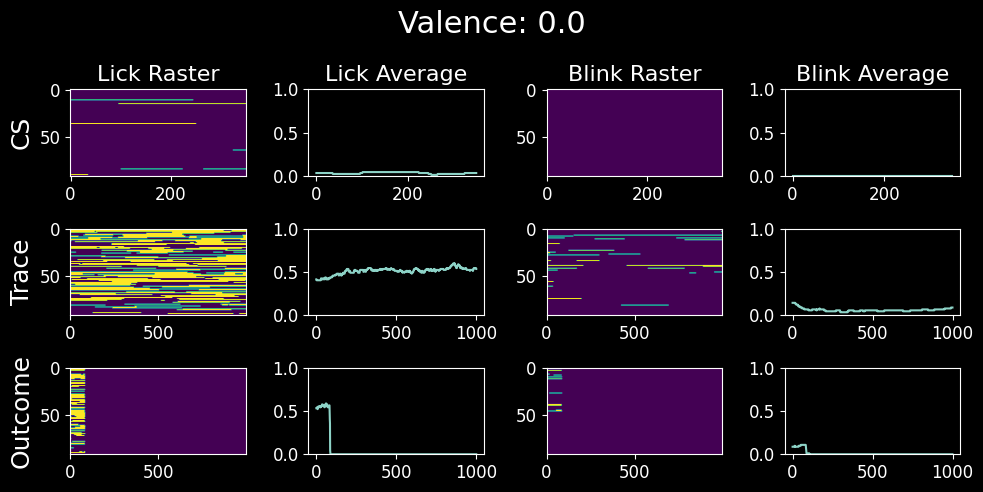

Valence: 0.0
  Lick CS: 0.032
  Lick Trace: 0.509
  Lick Outcome: 0.048


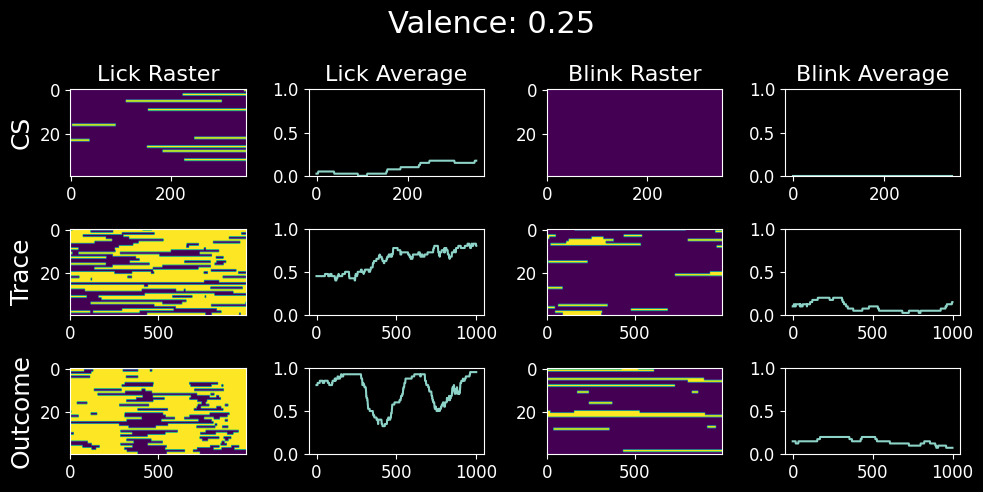

Valence: 0.25
  Lick CS: 0.088
  Lick Trace: 0.635
  Lick Outcome: 0.742


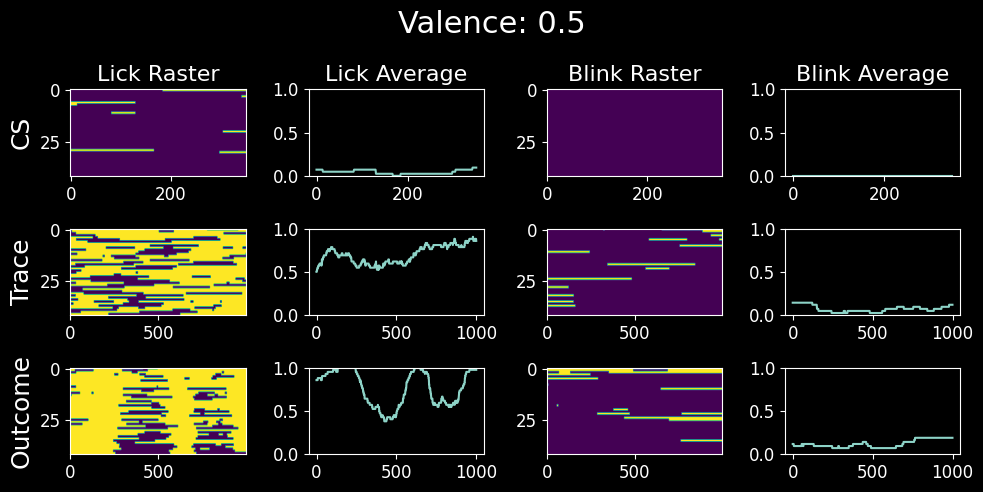

Valence: 0.5
  Lick CS: 0.043
  Lick Trace: 0.697
  Lick Outcome: 0.763


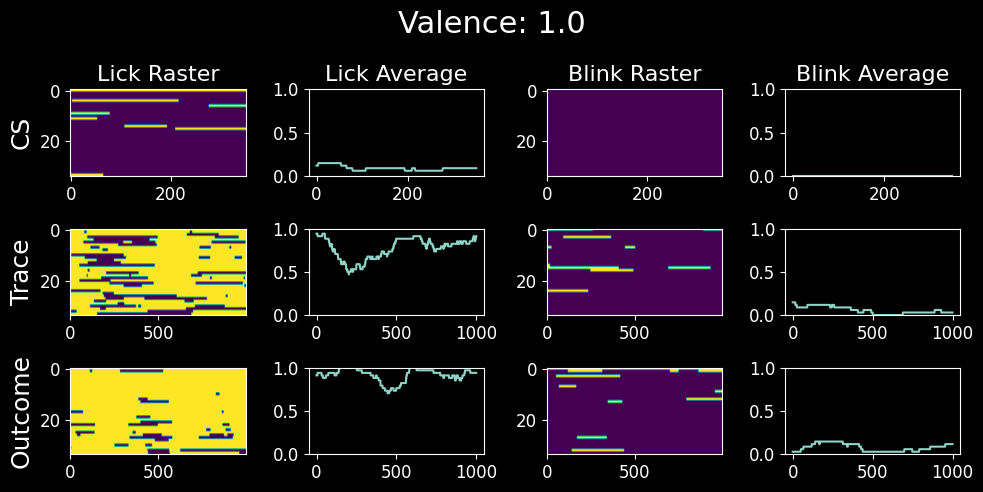

Valence: 1.0
  Lick CS: 0.089
  Lick Trace: 0.768
  Lick Outcome: 0.915


In [11]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [20]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 50) &
											 (session_df_correct['lick_duration'] > 0.6)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'fractal_not_chosen', 
		'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen fractal_not_chosen  \
15   240419         16      1     0.25     _fractal_C         _fractal_C   
16   240419         17      1     0.00     _fractal_E         _fractal_2   
25   240419         26      1     1.00     _fractal_A         _fractal_D   
46   240419         47      1     1.00     _fractal_A         _fractal_C   
53   240419         54      1     0.00     _fractal_E         _fractal_7   
64   240419         65      1     1.00     _fractal_A         _fractal_A   
69   240419         70      1     1.00     _fractal_A         _fractal_A   
75   240419         76      1     1.00     _fractal_A         _fractal_B   
96   240419         97      1     0.50     _fractal_B         _fractal_B   
104  240419        105      1     0.50     _fractal_B         _fractal_B   
117  240419        118      1     0.00     _fractal_E        _fractal_20   
118  240419        119      1     0.50     _fractal_B         _fractal_B   
123  240419        124      1     1.00     _fractal_A         _fractal_C   
132  240419        133      1     1.00     _fractal_A         _fractal_A   
134  240419        135      1     0.00     _fractal_D         _fractal_D   
150  240419        151      1     1.00     _fractal_A         _fractal_A   
155  240419        156      1     1.00     _fractal_A         _fractal_D   
159  240419        160      1     1.00     _fractal_A         _fractal_D   
168  240419        169      1     1.00     _fractal_A         _fractal_B   
169  240419        170      1     1.00     _fractal_A         _fractal_D   
170  240419        171      2     0.00     _fractal_A         _fractal_B   
183  240419        184      2     0.25     _fractal_C         _fractal_C   
186  240419        187      2     0.00     _fractal_B         _fractal_B   
188  240419        189      2     0.00     _fractal_B         _fractal_B   
191  240419        192      2     0.00     _fractal_B         _fractal_B   
195  240419        196      2     0.50     _fractal_D         _fractal_C   
209  240419        210      2     0.50     _fractal_D         _fractal_C   
211  240419        212      2     0.50     _fractal_D         _fractal_D   
213  240419        214      2     0.00     _fractal_B         _fractal_B   
214  240419        215      2     0.00     _fractal_A         _fractal_A   
219  240419        220      2     0.25     _fractal_C         _fractal_C   
230  240419        231      2     0.25     _fractal_C         _fractal_B   
233  240419        234      2     0.00     _fractal_B         _fractal_B   
242  240419        243      2     0.00     _fractal_B         _fractal_B   
248  240419        249      2     0.00     _fractal_A         _fractal_A   
261  240419        262      2     0.00     _fractal_B         _fractal_A   
262  240419        263      2     0.25     _fractal_C         _fractal_C   
280  240419        281      2     0.25     _fractal_C         _fractal_C   
281  240419        282      2     0.50     _fractal_D         _fractal_D   
284  240419        285      2     0.50     _fractal_D         _fractal_A   
294  240419        295      2     1.00     _fractal_E        _fractal_39   
311  240419        312      2     0.50     _fractal_D         _fractal_D   
317  240419        318      2     0.50     _fractal_D         _fractal_C   
331  240419        332      2     0.25     _fractal_C         _fractal_A   
336  240419        337      2     0.50     _fractal_D         _fractal_B   

     lick_duration  blink_duration_offscreen  eye_distance  
15           0.872                  0.140000     45.502326  
16           0.993                  0.133846     40.186609  
25           0.991                  0.138462     47.054120  
46           0.770                  0.190769     43.650940  
53           0.897                  0.145385     38.419411  
64           0.970                  0.116154     36.430780  
69           0.702                  0.124615     47.309611  
75           0.721    

### High DEM + Blink + Eye Movement / Low Lick Trials

In [13]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.5) &
											 (session_df_correct['eye_distance'] > 100) & 
											 (session_df_correct['lick_duration'] < 0.4)]\
		[['date', 'trial_num', 'block', 'valence', 'fractal_chosen', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  block  valence fractal_chosen  lick_duration  \
140  240419        141      1     0.00     _fractal_D          0.346   
306  240419        307      2     0.25     _fractal_C          0.393   
312  240419        313      2     0.50     _fractal_D          0.364   

     blink_duration_offscreen  eye_distance  
140                  0.948462    266.790241  
306                  0.697692    261.026126  
312                  0.590769    435.806637

In [19]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation 0.015
Lick vs. Blink Correlation -0.066
DEM vs. Blink Correlation 0.484
Pupil 0 vs. Blink Correlation 0.948


***
### Video Test

In [22]:
trial_specified = 27
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
26                    1      0.0     _fractal_B         0.0          0.0  \

    lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
26          0.484                  0.943077                 0.104615  \

    blink_duration_window  
26               0.263846

***
## Single Trial Analysis

In [16]:
trial_selected = 15
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
14        1     -0.5            1.0                 0.0  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
14                  0.149231                      0.0                    0.0  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
14     56.179174          4488           <NA>            4506

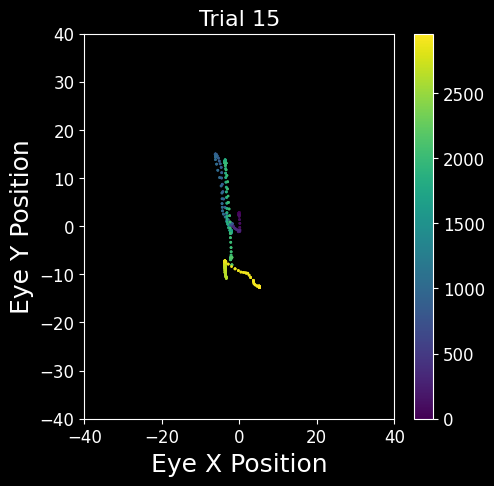

In [17]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1500
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.5187 0.352  0.1293 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 12.93%
outside x,y [-40, 40]: 0.0%
  eye_heatmap_-0.5.png saved.


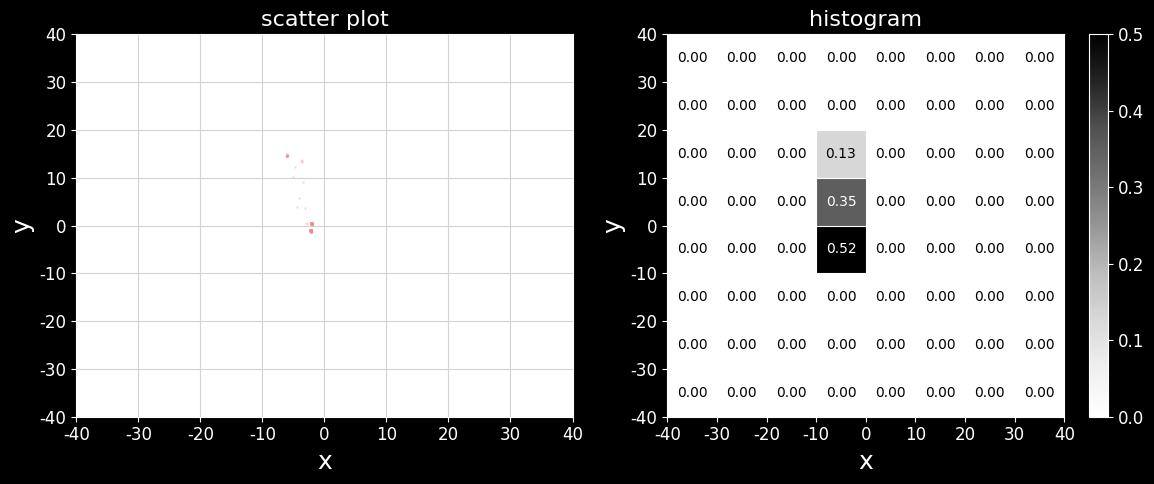

In [18]:
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

In [14]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

Created new session folder: /Users/rahimhashim/Desktop/Monkey-Emotions/_data/Aragorn_231026


AttributeError: 'SessionPath' object has no attribute 'spikeglx_dir_path'

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [100]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': True}

parse_wm_videos(**kwargs)

Parsing Trials for Videos: 0 - 1176
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 0    | Frames: 368-547
  Video complete: Cam: e3v8360 | Trial: 227  | Frames: 9066-9245
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 65   | Frames: 46190-46367
  Video complete: Cam: e3v8360 | Trial: 257  | Frames: 32736-32915
  Video complete: Cam: e3v8360 | Trial: 3    | Frames: 3533-3711
  Video complete: Cam: e3v8360 | Trial: 1    | Frames: 1529-1706
  Video complete: Cam: e3v8360 | Trial: 215  | Frames: 25-203
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 427  | Frames: 4125-4303
  Video complete: Cam: e3v8360 | Trial: 97   | Frames: 67457-67636
  Video complete: Cam: e3v8360 | Trial: 118  | Frames: 81274-81452
  Video complete: Cam: e3v8360 | Trial: 641  | Frames: 808-987
  Video complete: Cam: e3v8360 | Trial

## Generate MonkeyLogic Behavior Trial Videos


In [36]:
from video.ml_videos import generate_ml_behavior_videos
trial_selected = 3
generate_ml_behavior_videos(session_df, session_obj, trial_selected, 'Trace Start', 'Outcome Start')

Generating video for trial 3
  Generating frames for trial 3 from 3080 to 4570


Trial 3 frame:   0%|          | 0/1490 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/eye_0002.mp4


Trial 2 eye:   0%|          | 0/1490 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/lick_0002.mp4


Trial 2 lick:   0%|          | 0/1490 [00:00<?, ?it/s]

Deleting image folder: /Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/trial_2


TypeError: 'recursive' is an invalid keyword argument for rmdir()

In [39]:
import shutil
shutil.rmtree('/Users/rahimhashim/Desktop/Monkey-Emotions/video/aragorn_231106/trial_1')

***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [ ]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

In [ ]:
for key in dlc_video_path_dict.keys():
   video_path_list = dlc_video_path_dict[key]
   video_list_subset = video_path_list[:]
   config_path = config_path_dict[key]
   # Adding new videos to the config.yaml file
   deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
               coords=None, extract_frames=False
   )

   # Analyze specified videos
   deeplabcut.analyze_videos(config_path, video_list_subset, 
               videotype, save_as_csv=True
   )

   # Filter predictions
   deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

   # Create labeled videos
   deeplabcut.create_labeled_video(
      config_path, video_list_subset, 
      videotype, 
      draw_skeleton=True, 
      filtered=True,
      trailpoints=5,
   )

   # Plot trajectories
   deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

In [ ]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
  dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')